In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams['font.family'] = 'NanumGothic'
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../01.Data_Collection/films.csv')
print(df.shape)

(810, 38)


In [11]:
df.dtypes

순위          float64
영화명          object
영화코드          int64
개봉일          object
매출액         float64
매출액점유율       object
누적매출액       float64
관객수         float64
누적관객수       float64
스크린수        float64
상영횟수        float64
대표국적         object
국적           object
제작사          object
배급사          object
등급           object
장르           object
F-rated       int64
감독           object
대표감독         object
감독코드        float64
감독성별         object
감독_대표역할      object
감독필모         object
작가           object
대표작가         object
대표작가(필명)     object
작가코드        float64
작가성별         object
작가_대표역할      object
작가필모         object
배우           object
주연배우         object
배역명          object
배우코드        float64
배우성별         object
배우_대표역할      object
배우필모         object
dtype: object

In [3]:
df.isnull().sum()

순위            2
영화명           0
영화코드          0
개봉일           0
매출액           0
매출액점유율        2
누적매출액         0
관객수           0
누적관객수         0
스크린수          0
상영횟수          0
대표국적          2
국적            2
제작사          22
배급사           3
등급            2
장르            2
F-rated       0
감독            5
대표감독         24
감독코드         24
감독성별         27
감독_대표역할      24
감독필모         24
작가          140
대표작가        132
대표작가(필명)    131
작가코드        131
작가성별        166
작가_대표역할     131
작가필모        131
배우            0
주연배우          0
배역명         452
배우코드          0
배우성별         18
배우_대표역할       0
배우필모         71
dtype: int64

## 컬럼 간 상관관계

In [4]:
df.corr()

,순위,영화코드,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,감독코드,작가코드,배우코드
순위,1.000000,-0.013005,-0.348544,-0.348581,-0.350409,-0.350454,-0.586295,-0.443125,0.019079,0.128307,0.020790,0.228910
영화코드,-0.013005,1.000000,-0.019796,-0.019779,-0.028073,-0.028044,0.057348,-0.003790,0.004467,0.195698,0.112183,0.091142
매출액,-0.348544,-0.019796,1.000000,1.000000,0.999190,0.999192,0.776337,0.944990,-0.129398,-0.141496,-0.048335,-0.152093
누적매출액,-0.348581,-0.019779,1.000000,1.000000,0.999187,0.999191,0.776381,0.945017,-0.129366,-0.141480,-0.048334,-0.152119
관객수,-0.350409,-0.028073,0.999190,0.999187,1.000000,0.999999,0.775785,0.942883,-0.129217,-0.145533,-0.048390,-0.153033
누적관객수,-0.350454,-0.028044,0.999192,0.999191,0.999999,1.000000,0.775842,0.942921,-0.129164,-0.145503,-0.048379,-0.153066
스크린수,-0.586295,0.057348,0.776337,0.776381,0.775785,0.775842,1.000000,0.876860,-0.131027,-0.189418,-0.060482,-0.210839
상영횟수,-0.443125,-0.003790,0.944990,0.945017,0.942883,0.942921,0.876860,1.000000,-0.123576,-0.158877,-0.057520,-0.174181
F-rated,0.019079,0.004467,-0.129398,-0.129366,-0.129217,-0.129164,-0.131027,-0.123576,1.000000,0.039770,0.070856,0.140509
감독코드,0.128307,0.195698,-0.141496,-0.141480,-0.145533,-0.145503,-0.189418,-0.158877,0.039770,1.000000,0.632161,0.127706


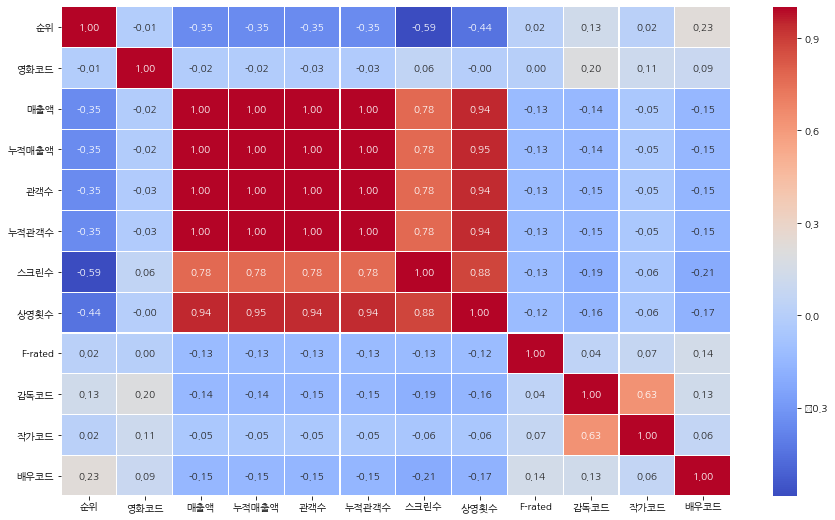

In [8]:
plt.figure(figsize=[15, 9])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

## 연도별 F-rating과 매출의 상관관계
가설: 2015년에서 2019년으로 올 수록 상관관계가 양의 방향으로 증가할 것이다.  
결과: 2015년 -0.09, 2016년 -0.14, 2017년 -0.09, 2018년 -0.12, 2019년 -0.14로 꾸준히 음의 상관관계일 뿐 연도별로 큰 차이가 나거나 변화의 방향성은 보이지 않는다.  
추가로 할 것: 여성주도영화 개수를 비교

In [12]:
df['개봉일'].head()

0    2015-01-07
1    2015-01-08
2    2015-01-14
3    2015-01-14
4    2015-01-15
Name: 개봉일, dtype: object

In [13]:
# 분명 datetime으로 바꿨는데 다시 object로 돌아왔네.. 무슨 일이야
df['개봉일'] = pd.to_datetime(df['개봉일'])

In [14]:
df['개봉일'].dtype

dtype('<M8[ns]')

In [16]:
released_2015 = df[df['개봉일'].dt.year == 2015]
released_2016 = df[df['개봉일'].dt.year == 2016]
released_2017 = df[df['개봉일'].dt.year == 2017]
released_2018 = df[df['개봉일'].dt.year == 2018]
released_2019 = df[df['개봉일'].dt.year == 2019]

In [17]:
released_2015.corr()

,순위,영화코드,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,감독코드,작가코드,배우코드
순위,1.000000,0.129278,-0.398735,-0.398742,-0.399036,-0.399042,-0.704483,-0.512216,-0.015951,0.247776,-0.001538,0.280091
영화코드,0.129278,1.000000,-0.024813,-0.024825,-0.025979,-0.025993,-0.084184,-0.038733,-0.035983,0.059801,0.028684,0.148425
매출액,-0.398735,-0.024813,1.000000,1.000000,0.999888,0.999888,0.759919,0.955930,-0.090683,-0.125266,0.035270,-0.141687
누적매출액,-0.398742,-0.024825,1.000000,1.000000,0.999888,0.999888,0.759915,0.955928,-0.090678,-0.125280,0.035257,-0.141689
관객수,-0.399036,-0.025979,0.999888,0.999888,1.000000,1.000000,0.760569,0.955331,-0.089994,-0.127645,0.034942,-0.141812
누적관객수,-0.399042,-0.025993,0.999888,0.999888,1.000000,1.000000,0.760564,0.955329,-0.089987,-0.127658,0.034926,-0.141812
스크린수,-0.704483,-0.084184,0.759919,0.759915,0.760569,0.760564,1.000000,0.871712,-0.105255,-0.186102,0.060302,-0.183908
상영횟수,-0.512216,-0.038733,0.955930,0.955928,0.955331,0.955329,0.871712,1.000000,-0.103473,-0.141287,0.037991,-0.141812
F-rated,-0.015951,-0.035983,-0.090683,-0.090678,-0.089994,-0.089987,-0.105255,-0.103473,1.000000,-0.116113,-0.044003,0.131371
감독코드,0.247776,0.059801,-0.125266,-0.125280,-0.127645,-0.127658,-0.186102,-0.141287,-0.116113,1.000000,0.603677,0.024645


In [18]:
released_2016.corr()

,순위,영화코드,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,감독코드,작가코드,배우코드
순위,1.000000,0.046040,-0.391835,-0.391840,-0.394000,-0.394005,-0.636730,-0.491961,0.080439,0.157427,0.064040,0.291136
영화코드,0.046040,1.000000,-0.068236,-0.068245,-0.068626,-0.068636,-0.124440,-0.109457,-0.162099,0.217875,0.068605,-0.011428
매출액,-0.391835,-0.068236,1.000000,1.000000,0.999857,0.999857,0.840254,0.954313,-0.148469,-0.316591,-0.122658,-0.128910
누적매출액,-0.391840,-0.068245,1.000000,1.000000,0.999857,0.999857,0.840256,0.954313,-0.148465,-0.316583,-0.122652,-0.128912
관객수,-0.394000,-0.068626,0.999857,0.999857,1.000000,1.000000,0.841718,0.955060,-0.148020,-0.317557,-0.123308,-0.128001
누적관객수,-0.394005,-0.068636,0.999857,0.999857,1.000000,1.000000,0.841719,0.955060,-0.148014,-0.317547,-0.123302,-0.128003
스크린수,-0.636730,-0.124440,0.840254,0.840256,0.841718,0.841719,1.000000,0.918593,-0.104912,-0.399862,-0.139230,-0.199302
상영횟수,-0.491961,-0.109457,0.954313,0.954313,0.955060,0.955060,0.918593,1.000000,-0.128771,-0.374679,-0.142255,-0.146352
F-rated,0.080439,-0.162099,-0.148469,-0.148465,-0.148020,-0.148014,-0.104912,-0.128771,1.000000,0.070725,0.095500,0.205510
감독코드,0.157427,0.217875,-0.316591,-0.316583,-0.317557,-0.317547,-0.399862,-0.374679,0.070725,1.000000,0.617223,0.070472


In [19]:
released_2017.corr()

,순위,영화코드,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,감독코드,작가코드,배우코드
순위,1.000000,0.188024,-0.344206,-0.344261,-0.345338,-0.345392,-0.542607,-0.429202,0.077548,0.047983,-0.002946,0.166758
영화코드,0.188024,1.000000,-0.201485,-0.201688,-0.197415,-0.197617,-0.258405,-0.219963,0.037264,-0.106134,-0.055164,0.001220
매출액,-0.344206,-0.201485,1.000000,1.000000,0.999755,0.999755,0.829948,0.938091,-0.150477,-0.075233,-0.003863,-0.179477
누적매출액,-0.344261,-0.201688,1.000000,1.000000,0.999754,0.999755,0.829981,0.938094,-0.150545,-0.075271,-0.003942,-0.179485
관객수,-0.345338,-0.197415,0.999755,0.999754,1.000000,1.000000,0.832909,0.938225,-0.149721,-0.076105,-0.003097,-0.179222
누적관객수,-0.345392,-0.197617,0.999755,0.999755,1.000000,1.000000,0.832940,0.938227,-0.149785,-0.076139,-0.003171,-0.179229
스크린수,-0.542607,-0.258405,0.829948,0.829981,0.832909,0.832940,1.000000,0.895382,-0.166693,-0.129396,-0.096217,-0.225148
상영횟수,-0.429202,-0.219963,0.938091,0.938094,0.938225,0.938227,0.895382,1.000000,-0.162561,-0.078020,-0.044692,-0.205324
F-rated,0.077548,0.037264,-0.150477,-0.150545,-0.149721,-0.149785,-0.166693,-0.162561,1.000000,-0.085258,-0.078080,0.006734
감독코드,0.047983,-0.106134,-0.075233,-0.075271,-0.076105,-0.076139,-0.129396,-0.078020,-0.085258,1.000000,0.636622,0.169547


In [20]:
released_2018.corr()

,순위,영화코드,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,감독코드,작가코드,배우코드
순위,1.000000,-0.102651,-0.345902,-0.345907,-0.348567,-0.348572,-0.544708,-0.430740,0.020350,0.127039,0.035237,0.218117
영화코드,-0.102651,1.000000,0.048001,0.047987,0.047232,0.047215,0.011924,0.007629,0.033597,0.179142,0.122384,0.081734
매출액,-0.345902,0.048001,1.000000,1.000000,0.999705,0.999705,0.808298,0.926656,-0.125992,-0.240243,-0.220891,-0.160343
누적매출액,-0.345907,0.047987,1.000000,1.000000,0.999705,0.999705,0.808292,0.926653,-0.125993,-0.240237,-0.220882,-0.160352
관객수,-0.348567,0.047232,0.999705,0.999705,1.000000,1.000000,0.811987,0.927884,-0.125585,-0.240494,-0.219048,-0.161859
누적관객수,-0.348572,0.047215,0.999705,0.999705,1.000000,1.000000,0.811979,0.927881,-0.125583,-0.240488,-0.219039,-0.161866
스크린수,-0.544708,0.011924,0.808298,0.808292,0.811987,0.811979,1.000000,0.897216,-0.146296,-0.283161,-0.144080,-0.235361
상영횟수,-0.430740,0.007629,0.926656,0.926653,0.927884,0.927881,0.897216,1.000000,-0.118181,-0.264367,-0.208107,-0.189725
F-rated,0.020350,0.033597,-0.125992,-0.125993,-0.125585,-0.125583,-0.146296,-0.118181,1.000000,0.072806,0.097279,0.102615
감독코드,0.127039,0.179142,-0.240243,-0.240237,-0.240494,-0.240488,-0.283161,-0.264367,0.072806,1.000000,0.578564,0.204940


In [21]:
released_2019.corr()

,순위,영화코드,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,감독코드,작가코드,배우코드
순위,1.000000,-0.039953,-0.311221,-0.311340,-0.314468,-0.314627,-0.601687,-0.407688,-0.122802,0.155543,0.031697,0.259922
영화코드,-0.039953,1.000000,-0.049982,-0.050093,-0.048831,-0.048960,0.011217,-0.050674,-0.127063,0.055708,0.111950,-0.019545
매출액,-0.311221,-0.049982,1.000000,0.999999,0.999889,0.999884,0.722482,0.962573,-0.138567,0.025185,0.057073,-0.170176
누적매출액,-0.311340,-0.050093,0.999999,1.000000,0.999889,0.999888,0.722635,0.962670,-0.138369,0.025203,0.057105,-0.170324
관객수,-0.314468,-0.048831,0.999889,0.999889,1.000000,0.999997,0.726817,0.964250,-0.138763,0.024158,0.056982,-0.171179
누적관객수,-0.314627,-0.048960,0.999884,0.999888,0.999997,1.000000,0.727023,0.964383,-0.138459,0.024215,0.057055,-0.171384
스크린수,-0.601687,0.011217,0.722482,0.722635,0.726817,0.727023,1.000000,0.843491,-0.160024,-0.095457,-0.011084,-0.282323
상영횟수,-0.407688,-0.050674,0.962573,0.962670,0.964250,0.964383,0.843491,1.000000,-0.122321,0.000658,0.062189,-0.216870
F-rated,-0.122802,-0.127063,-0.138567,-0.138369,-0.138763,-0.138459,-0.160024,-0.122321,1.000000,0.164257,0.189683,0.216315
감독코드,0.155543,0.055708,0.025185,0.025203,0.024158,0.024215,-0.095457,0.000658,0.164257,1.000000,0.726319,0.094679


## 배급사별 F-rated 영화 비율 (재민 작업중)
가설: 많은 스크린수와 상영횟수를 확보하는 대형 배급사가 여성주도영화를 많이 배급하지 않는다.  
결과:

In [22]:
f_rating_proportion = pd.DataFrame({'F-rated': [0, 1, 2, 3]})

for cp in df['배급사'].unique():
    dist = df[df['배급사'] == cp]
    by_dist = (dist.groupby('F-rated')['영화명'].count() / len(dist) * 100).reset_index().rename(columns = {'영화명':cp})
    f_rating_proportion = f_rating_proportion.merge(by_dist, how='left', on='F-rated')

f_rating_proportion = f_rating_proportion.T.drop('F-rated', axis=0) 

In [23]:
f_rating_proportion.head()

,0,1,2,3
메가박스중앙(주)플러스엠,39.130435,39.130435,17.391304,4.347826
"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",100.000000,NaN,NaN,NaN
(주)넥스트엔터테인먼트월드(NEW),62.745098,27.450980,7.843137,1.960784
씨제이이앤엠(주),57.407407,35.185185,3.703704,3.703704
고구마콘텐츠허브(주),100.000000,NaN,NaN,NaN


In [24]:
film_numbers = df['배급사'].value_counts().reset_index().set_index('index').rename(columns={'배급사':'영화개수'})
del film_numbers.index.name
film_numbers.head()

,영화개수
씨제이이앤엠(주),54
(주)넥스트엔터테인먼트월드(NEW),51
(주)리틀빅픽쳐스,37
(주)쇼박스,33
㈜인디스토리,31


In [25]:
f_rating_proportion = f_rating_proportion.merge(film_numbers, how='inner', left_index=True, right_index=True).sort_values('영화개수', ascending=False)
f_rating_proportion

,0,1,2,3,영화개수
씨제이이앤엠(주),57.407407,35.185185,3.703704,3.703704,54
(주)넥스트엔터테인먼트월드(NEW),62.745098,27.450980,7.843137,1.960784,51
(주)리틀빅픽쳐스,54.054054,24.324324,10.810811,10.810811,37
(주)쇼박스,60.606061,27.272727,12.121212,NaN,33
㈜인디스토리,67.741935,19.354839,6.451613,6.451613,31
CGV아트하우스,46.153846,38.461538,7.692308,7.692308,26
(주)드림팩트엔터테인먼트,52.173913,43.478261,4.347826,NaN,23
메가박스중앙(주)플러스엠,39.130435,39.130435,17.391304,4.347826,23
롯데쇼핑㈜롯데엔터테인먼트,56.521739,30.434783,13.043478,NaN,23
(주)인디플러그,40.000000,35.000000,10.000000,15.000000,20


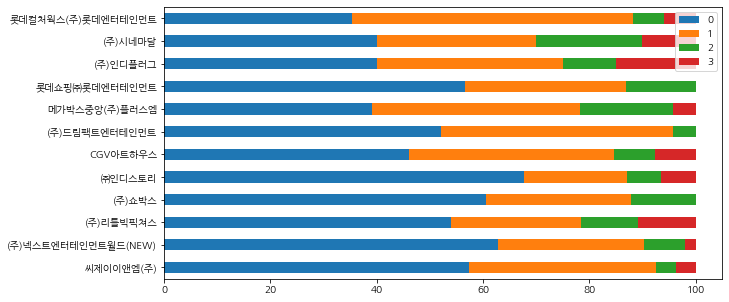

In [26]:
# 영화개수 상위 12개 배급사의 F-rated 영화 비율
plt.rcParams["figure.figsize"] = (10,5)
f_rating_proportion.iloc[:12, :4].plot(kind='barh', stacked=True, title='')

In [27]:
# 롯데쇼핑㈜롯데엔터테인먼트 = 롯데컬처웍스(주)롯데엔터테인먼트 등 배급사명 전처리 필요

In [28]:
# 상영기간 추가로 보기